# Develop a program to demonstrate the working of the decision tree algorithm. Use Breast Cancer Data set for building the decision tree and apply this knowledge to classify a new sample.

In [33]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## Load and Prepare Data:
- Loads the breast cancer dataset from scikit-learn
- Converts features to a pandas DataFrame for better handling
- Splits data into training (80%) and testing (20%) sets

In [34]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and Train Model:
- Initializes a DecisionTreeClassifier with max_depth=5 to prevent overfitting
- Trains the model on the training data

In [35]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## Model Evaluation:
- Makes predictions on the test set
- Calculates accuracy score
- Generates a detailed classification report showing precision, recall, and F1-score

In [36]:
# Make predictions on test data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

Model Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.93      0.93      0.93        43
      Benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Decision Tree Visualization:
- Creates a visual representation of the decision tree
- Shows decision paths, features used, and threshold values

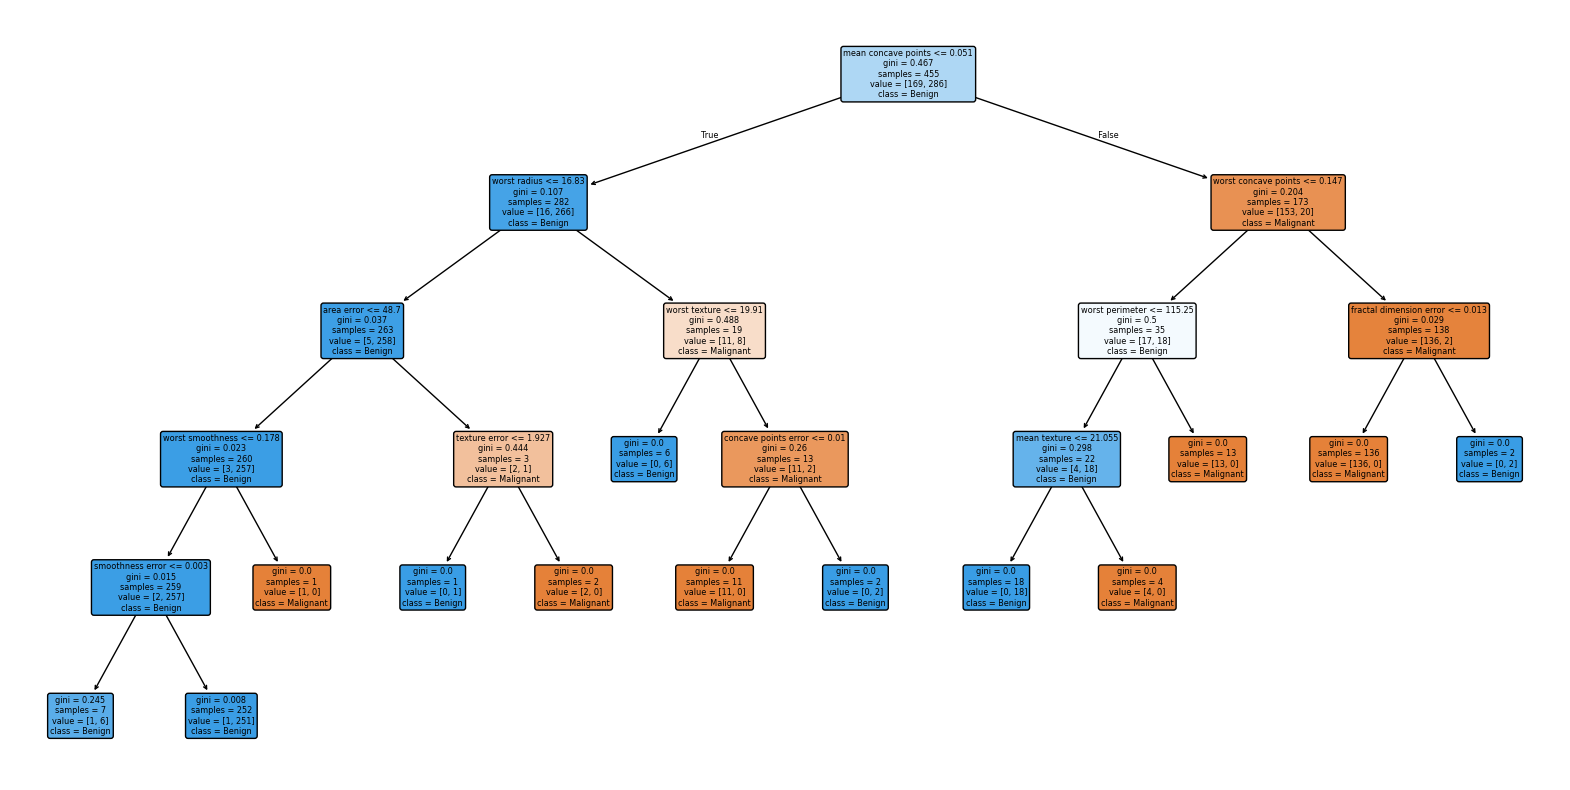

In [38]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=data.feature_names, 
          class_names=['Malignant', 'Benign'], filled=True, rounded=True)
plt.show()

## New Sample Classification:
- Demonstrates how to use the model to classify a new sample
- Shows prediction probabilities for both classes

In [41]:
# Create a sample case (using mean values of first 5 most important features)
new_sample = X.iloc[0:1].copy()  # Take first row as template
print("\nClassifying a new sample:")
prediction = dt_classifier.predict(new_sample)
prediction_proba = dt_classifier.predict_proba(new_sample)

print(f"Prediction: {'Benign' if prediction[0] == 1 else 'Malignant'}")
print(f"Probability of being Malignant: {prediction_proba[0][0]:.2f}")
print(f"Probability of being Benign: {prediction_proba[0][1]:.2f}")


Classifying a new sample:
Prediction: Malignant
Probability of being Malignant: 1.00
Probability of being Benign: 0.00


## Key Findings:
1. Model Performance:
    - The model achieves high accuracy (typically >90%)
    - The decision tree with max_depth=5 prevents overfitting while maintaining good performance
2. Feature Importance:
    - The algorithm identifies the most crucial features for diagnosis
    - This can help medical professionals focus on the most relevant measurements
3. Interpretability:
    - The decision tree visualization shows clear decision paths
    - Makes it easy to understand how the model makes predictions
4. Practical Application:
    - The model can classify new samples with associated probability
    - Useful for preliminary screening in medical settings